In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import numpy as np
import matplotlib
%matplotlib inline
import bs4 as bs # beautifulsoup4
import sklearn
import numpy
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

#import fix_yahoo_finance as fyf

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
import quandl

#import talib

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 7)
matplotlib.rc('font', family='Verdana') # for Russian

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### TICKERS

MOEX: https://www.moex.com/en/marketdata/#/group=12&collection=72&boardgroup=9&data_type=current&mode=groups&sort=SHORTNAME&order=asc

## CURRENCY

In [6]:
start_date = dt.datetime(2015, 1, 1)
end_date = dt.datetime.now()

currency_ticker = 'USD000UTSTOM'
currency = web.DataReader(currency_ticker, 'moex', start_date, end_date)

In [7]:
currency = currency[(currency.BOARDID == 'CETS') & (currency.CLOSE > 0)]['CLOSE']
currency.head()

TRADEDATE
2015-01-06    63.240
2015-01-08    60.301
2015-01-09    61.550
2015-01-12    63.170
2015-01-13    65.250
Name: CLOSE, dtype: float64

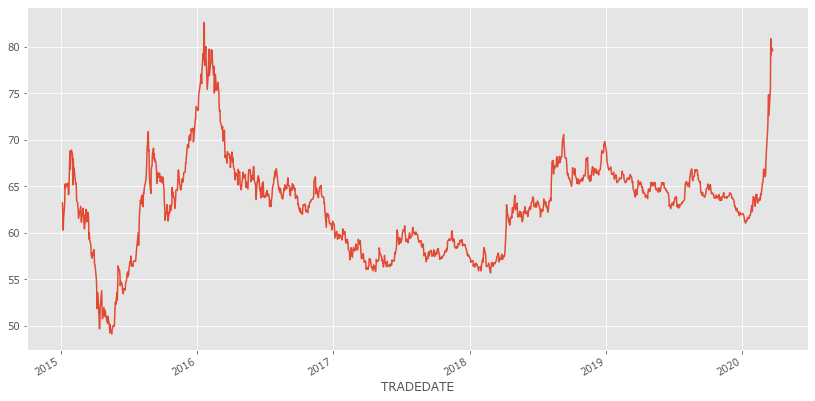

In [8]:
currency.plot()

In [9]:
#currency.to_csv('USDRUB.csv')

In [13]:
currency.groupby(eurrub.index.month).mean()

TRADEDATE
1     72.735222
2     73.313658
3     69.489698
4     68.214260
5     67.975358
6     68.829292
7     69.429732
8     73.247563
9     73.157849
10    70.944338
11    70.946078
12    71.359342
Name: CLOSE, dtype: float64

## STOCKS

In [25]:
moex_tickers = pd.read_csv('/Users/maxim_anisimov/Desktop/Python Projects/MOEX_stocks_tickers.csv')
moex_tickers = moex_tickers['SECID'].tolist()
moex_tickers[:5]

['ABRD', 'AFKS', 'AFLT', 'AKRN', 'ALBK']

In [95]:
start_date = dt.datetime(2015, 1, 1)
end_date = dt.datetime.now()

df = web.DataReader(moex_tickers[0], 'moex', start_date, end_date)
most_freq_boardid = df.BOARDID.value_counts().index[0]
df = df[df.BOARDID == most_freq_boardid][['CLOSE']]
df.columns = [moex_tickers[0]]

for i in range(1,len(moex_tickers)):
    
    print(moex_tickers[i])
    cur_df = web.DataReader(moex_tickers[i], 'moex', start_date, end_date)
    
    if cur_df.empty == False:
        most_freq_boardid = cur_df.BOARDID.value_counts().index[0]
        cur_df = cur_df[cur_df.BOARDID == most_freq_boardid][['CLOSE']]
        cur_df.columns = [moex_tickers[i]]
        df = pd.merge(df, cur_df, how='outer', left_index=True, right_index=True)
        
    else:
        print('Skipped!')
        
df.to_excel('MOEX_stocks.xlsx')

AFKS
AFLT
AKRN
ALBK
ALNU
ALRS
AMEZ
APTK
AQUA
ARSA
Skipped!
ASSB
Skipped!
AVAN
Skipped!
BANE
BANEP
BELU
BISV
BISVP
BLNG
BRZL
BSPB
CBOM
CHEP
CHGZ
Skipped!
CHKZ
Skipped!
CHMF
CHMK
CNTL
CNTLP
DASB
DIOD
Skipped!
DSKY
DVEC
DZRD
Skipped!
DZRDP
Skipped!
ELTZ
Skipped!
ENRU
FEES
FESH
FTRE
GAZA
GAZAP
Skipped!
GAZC
Skipped!
GAZP
GAZS
Skipped!
GAZT
Skipped!
GCHE
GEMA
Skipped!
GMKN
GTRK
GTSS
Skipped!
HALS
HIMC
Skipped!
HIMCP
Skipped!
HYDR
IDVP
Skipped!
IGST
Skipped!
IGSTP
Skipped!
IRAO
IRGZ
IRKT
ISKJ
Skipped!
JNOS
Skipped!
JNOSP
Skipped!
KAZT
KAZTP
Skipped!
KBSB
Skipped!
KBTK
KCHE
Skipped!
KCHEP
Skipped!
KGKC
Skipped!
KGKCP
Skipped!
KLSB
KMAZ
KMEZ
KMTZ
Skipped!
KOGK
KRKN
KRKNP
KRKO
Skipped!
KRKOP
Skipped!
KROT
KROTP
KRSB
Skipped!
KRSBP
KSGR
Skipped!
KTSB
Skipped!
KTSBP
Skipped!
KUBE
KUNF
Skipped!
KUZB
KZMS
Skipped!
KZOS
KZOSP
LIFE
LKOH
LNZL
LNZLP
LPSB
Skipped!
LSNG
LSNGP
LSRG
LVHK
MAGE
Skipped!
MAGEP
Skipped!
MAGN
MERF
MFGS
MFGSP
MFON
MGNT
MGNZ
MGTS
MGTSP
MISB
Skipped!
MISBP
Skipped!
MOBB
MOEX
MORI


In [11]:
start_date = dt.datetime(2015, 1, 1)
end_date = dt.datetime.now()

moex_index = web.DataReader('IMOEX', 'moex', start_date, end_date)
#moex_index = moex_index[][['CLOSE']]
sber = web.DataReader('SBER', 'moex', start_date, end_date)
yandex = web.DataReader('YNDX', 'moex', start_date, end_date)
lukoil = web.DataReader('LKOH', 'moex', start_date, end_date)
x5_retail = web.DataReader('FIVE', 'moex', start_date, end_date)

moex_index.head()

,BOARDID,SECID,SHORTNAME,NAME,CLOSE,OPEN,HIGH,LOW,VALUE,DURATION,YIELD,DECIMALS,CAPITALIZATION,CURRENCYID,DIVISOR
TRADEDATE,,,,,,,,,,,,,,,
2015-01-06,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,1480.73,1435.39,1481.35,1430.47,2.126881e+10,NaN,NaN,2,6.863935e+12,RUB,4.635503e+09
2015-01-08,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,1547.39,1482.12,1564.87,1481.93,3.550506e+10,NaN,NaN,2,7.172914e+12,RUB,4.635503e+09
2015-01-09,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,1515.37,1547.61,1557.96,1496.17,2.722306e+10,NaN,NaN,2,7.024481e+12,RUB,4.635503e+09
2015-01-12,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,1513.22,1515.23,1534.74,1503.49,2.341906e+10,NaN,NaN,2,7.014538e+12,RUB,4.635503e+09
2015-01-13,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,1533.09,1513.21,1543.59,1499.57,3.313366e+10,NaN,NaN,2,7.106621e+12,RUB,4.635503e+09


In [13]:
moex_index = moex_index.rename({'CLOSE': 'IMOEX'})
moex_index = moex_index[['CLOSE']]

In [14]:
sber['BOARDID'].value_counts()

RPMA    1082
RPMO     233
RPEU      16
Name: BOARDID, dtype: int64

In [155]:
sber = sber[sber.BOARDID == 'TQBR']
sber = sber.rename({'CLOSE': 'SBER'})
sber = sber[['CLOSE']]
sber.head()

,CLOSE
TRADEDATE,
2018-01-04,238.80
2018-01-05,238.60
2018-01-09,240.40
2018-01-10,237.76
2018-01-11,239.00


In [156]:
rosneft = rosneft[rosneft.BOARDID == 'TQBR']
rosneft = rosneft.rename({'CLOSE': 'SBER'})
rosneft = rosneft[['CLOSE']]
rosneft.head()

,CLOSE
TRADEDATE,
2018-01-04,595.0
2018-01-05,605.1
2018-01-09,591.4
2018-01-10,582.0
2018-01-11,594.6


In [157]:
stocks = pd.concat([moex_index, sber, rosneft], axis=1, join='inner')

stocks.columns = ['IMOEX', 'SBER', 'RNFT']

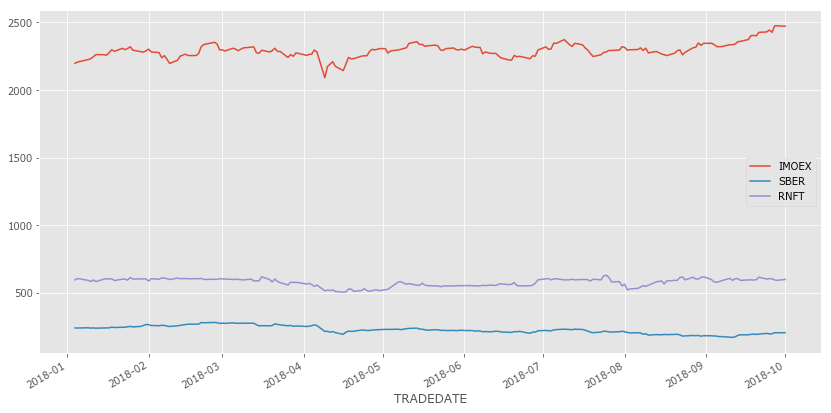

In [158]:
stocks.plot();

In [159]:
stocks['IMOEX_return'] = stocks.IMOEX.pct_change()
stocks['SBER_return'] = stocks.SBER.pct_change()
stocks['RNFT_return'] = stocks.RNFT.pct_change()

In [160]:
from talib import SMA, EMA

In [161]:
stocks['IMOEX_SMA'] = SMA(np.array(stocks['IMOEX']))
#stocks['IMOEX_EMA'] = EMA(np.array(stocks['IMOEX']))

stocks['SBER_SMA'] = SMA(np.array(stocks['SBER']))
#stocks['SBER_EMA'] = EMA(np.array(stocks['SBER']))

stocks['RNFT_SMA'] = SMA(np.array(stocks['RNFT']))

In [162]:
stocks = stocks.dropna()
stocks.head()

,IMOEX,SBER,RNFT,IMOEX_return,SBER_return,RNFT_return,IMOEX_SMA,SBER_SMA,RNFT_SMA
TRADEDATE,,,,,,,,,
2018-02-15,2265.45,264.58,605.0,0.003322,0.009732,0.001656,2263.657333,249.361667,599.686667
2018-02-16,2255.27,266.99,603.0,-0.004494,0.009109,-0.003306,2265.579667,250.301333,599.953333
2018-02-19,2254.92,266.85,604.0,-0.000155,-0.000524,0.001658,2267.163333,251.243000,599.916667
2018-02-20,2270.12,267.22,603.5,0.006741,0.001387,-0.000828,2268.654333,252.137000,600.320000
2018-02-21,2320.32,279.20,606.0,0.022113,0.044832,0.004143,2271.589333,253.518333,601.120000


In [163]:
signal_imoex = stocks.IMOEX >= stocks.IMOEX_SMA
signal_sber = stocks.SBER >= stocks.SBER_SMA
signal_rnft = stocks.RNFT >= stocks.RNFT_SMA

signals = pd.DataFrame({'IMOEX': signal_imoex, 'SBER': signal_sber, 'RNFT': signal_rnft}, index=stocks.index)

signals.head()

,IMOEX,SBER,RNFT
TRADEDATE,,,
2018-02-15,True,True,True
2018-02-16,False,True,True
2018-02-19,False,True,True
2018-02-20,True,True,True
2018-02-21,True,True,True


In [164]:
stocks = stocks.drop(['IMOEX', 'SBER', 'RNFT'], axis=1)
stocks.head()

,IMOEX_return,SBER_return,RNFT_return,IMOEX_SMA,SBER_SMA,RNFT_SMA
TRADEDATE,,,,,,
2018-02-15,0.003322,0.009732,0.001656,2263.657333,249.361667,599.686667
2018-02-16,-0.004494,0.009109,-0.003306,2265.579667,250.301333,599.953333
2018-02-19,-0.000155,-0.000524,0.001658,2267.163333,251.243000,599.916667
2018-02-20,0.006741,0.001387,-0.000828,2268.654333,252.137000,600.320000
2018-02-21,0.022113,0.044832,0.004143,2271.589333,253.518333,601.120000


In [165]:
sign = signals.copy()

sign['n_stocks_included'] = sign.sum(axis=1)
sign['n_stocks_included'][sign['n_stocks_included'] == 0] = 1 # like investment in cash
sign.head()

/Users/maxim_anisimov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,IMOEX,SBER,RNFT,n_stocks_included
TRADEDATE,,,,
2018-02-15,True,True,True,3
2018-02-16,False,True,True,2
2018-02-19,False,True,True,2
2018-02-20,True,True,True,3
2018-02-21,True,True,True,3


In [187]:
weights = sign.copy()
weights['IMOEX'] = weights['IMOEX']/weights.n_stocks_included
weights['SBER'] = weights['SBER']/weights.n_stocks_included
weights['RNFT'] = weights['RNFT']/weights.n_stocks_included

weights.head(15)

,IMOEX,SBER,RNFT,n_stocks_included
TRADEDATE,,,,
2018-02-15,0.333333,0.333333,0.333333,3
2018-02-16,0.000000,0.500000,0.500000,2
2018-02-19,0.000000,0.500000,0.500000,2
2018-02-20,0.333333,0.333333,0.333333,3
2018-02-21,0.333333,0.333333,0.333333,3
2018-02-22,0.500000,0.500000,0.000000,2
2018-02-26,0.500000,0.500000,0.000000,2
2018-02-27,0.500000,0.500000,0.000000,2
2018-02-28,0.333333,0.333333,0.333333,3


In [188]:
changed_structure_mask = (signals != signals.shift()).sum(axis=1) > 0 

unchanged_structure_mask = (signals != signals.shift()).sum(axis=1) == 0 

In [189]:
returns = stocks.filter(regex='_return')
returns.head()

,IMOEX_return,SBER_return,RNFT_return
TRADEDATE,,,
2018-02-15,0.003322,0.009732,0.001656
2018-02-16,-0.004494,0.009109,-0.003306
2018-02-19,-0.000155,-0.000524,0.001658
2018-02-20,0.006741,0.001387,-0.000828
2018-02-21,0.022113,0.044832,0.004143


In [190]:
weights['structure_changed'] = changed_structure_mask
weights.head()

,IMOEX,SBER,RNFT,n_stocks_included,structure_changed
TRADEDATE,,,,,
2018-02-15,0.333333,0.333333,0.333333,3,True
2018-02-16,0.000000,0.500000,0.500000,2,True
2018-02-19,0.000000,0.500000,0.500000,2,False
2018-02-20,0.333333,0.333333,0.333333,3,True
2018-02-21,0.333333,0.333333,0.333333,3,False


In [191]:
weights[['IMOEX_aux', 'SBER_aux', 'RNFT_aux']] = weights.iloc[:, :3].shift(1)
weights.head()

,IMOEX,SBER,RNFT,n_stocks_included,structure_changed,IMOEX_aux,SBER_aux,RNFT_aux
TRADEDATE,,,,,,,,
2018-02-15,0.333333,0.333333,0.333333,3,True,NaN,NaN,NaN
2018-02-16,0.000000,0.500000,0.500000,2,True,0.333333,0.333333,0.333333
2018-02-19,0.000000,0.500000,0.500000,2,False,0.000000,0.500000,0.500000
2018-02-20,0.333333,0.333333,0.333333,3,True,0.000000,0.500000,0.500000
2018-02-21,0.333333,0.333333,0.333333,3,False,0.333333,0.333333,0.333333


In [192]:
weights['portfolio_return'] = np.nan
weights.head()

,IMOEX,SBER,RNFT,n_stocks_included,structure_changed,IMOEX_aux,SBER_aux,RNFT_aux,portfolio_return
TRADEDATE,,,,,,,,,
2018-02-15,0.333333,0.333333,0.333333,3,True,NaN,NaN,NaN,NaN
2018-02-16,0.000000,0.500000,0.500000,2,True,0.333333,0.333333,0.333333,NaN
2018-02-19,0.000000,0.500000,0.500000,2,False,0.000000,0.500000,0.500000,NaN
2018-02-20,0.333333,0.333333,0.333333,3,True,0.000000,0.500000,0.500000,NaN
2018-02-21,0.333333,0.333333,0.333333,3,False,0.333333,0.333333,0.333333,NaN


In [203]:
weighted_returns_array = np.multiply(np.array(returns), np.array(weights.iloc[:, :3]))
portfolio_return = weighted_returns_array.sum(axis=1)
portfolio_return[:10]

array([ 0.00490298,  0.0029015 ,  0.00056701,  0.00243318,  0.02369595,
        0.00049322,  0.00796483, -0.00553785, -0.01059432,  0.0027889 ])

In [200]:
1/3 * returns.iloc[0, 0] == weighted_returns_array[0, 0]

True

In [214]:
returns.head()

,IMOEX_return,SBER_return,RNFT_return
TRADEDATE,,,
2018-02-15,0.003322,0.009732,0.001656
2018-02-16,-0.004494,0.009109,-0.003306
2018-02-19,-0.000155,-0.000524,0.001658
2018-02-20,0.006741,0.001387,-0.000828
2018-02-21,0.022113,0.044832,0.004143


In [218]:
updated_weights = \
np.divide(np.multiply(np.array(weights.iloc[:, :3]), (1+np.array(returns))), (1+portfolio_return).reshape(160, -1))

In [ ]:
for 

In [111]:
weights = sign.copy()
weights['IMOEX'][changed_structure_mask] = weights['IMOEX']/weights.n_stocks_included
weights['SBER'][changed_structure_mask] = weights['SBER']/weights.n_stocks_included
weights['RNFT'][changed_structure_mask] = weights['RNFT']/weights.n_stocks_included

/Users/maxim_anisimov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/maxim_anisimov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/maxim_anisimov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the 

In [112]:
weights.head(15)

,IMOEX,SBER,RNFT,n_stocks_included
TRADEDATE,,,,
2018-02-15,0.333333,0.333333,0.333333,3
2018-02-16,0.000000,0.500000,0.500000,2
2018-02-19,0.000000,1.000000,1.000000,2
2018-02-20,0.333333,0.333333,0.333333,3
2018-02-20,1.000000,1.000000,1.000000,3
2018-02-21,1.000000,1.000000,1.000000,3
2018-02-22,0.500000,0.500000,0.000000,2
2018-02-26,1.000000,1.000000,0.000000,2
2018-02-27,1.000000,1.000000,0.000000,2


updating_rato = weight*(1+return)/(1+portfolio_return)

In [116]:
sign[unchanged_structure_mask] = sign

,IMOEX,SBER,RNFT,n_stocks_included
TRADEDATE,,,,
2018-02-19,False,True,True,2
2018-02-20,True,True,True,3
2018-02-21,True,True,True,3
2018-02-26,True,True,False,2
2018-02-27,True,True,False,2
2018-03-01,True,True,True,3
2018-03-05,True,True,False,2
2018-03-06,True,True,False,2
2018-03-07,True,True,False,2


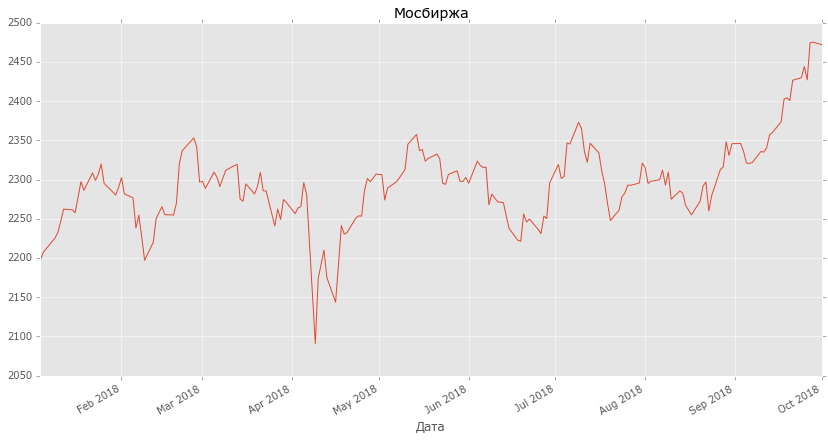

In [78]:
moex_index['CLOSE'].plot()
plt.title('Мосбиржа')
plt.xlabel('Дата')

In [76]:
ofz_bonds = ['SU26209RMFS5', 'SU29012RMFS0', 'SU29011RMFS2', 'SU29010RMFS4', 'SU29009RMFS6', 'SU29008RMFS8',
            'SU29007RMFS0', 'SU29006RMFS2', 'SU26225RMFS1', 'SU26224RMFS4', 'SU26223RMFS6', 'SU26222RMFS8',
            'SU26221RMFS0', 'SU26220RMFS2', 'SU26219RMFS4', 'SU26218RMFS6', 'SU26217RMFS8', 'SU26216RMFS0',
            'SU26215RMFS2', 'SU26214RMFS5', 'SU26212RMFS9', 'SU26211RMFS1', 'SU26210RMFS3', 'SU26209RMFS5',
            'SU26208RMFS7', 'SU26207RMFS9', 'SU26205RMFS3', 'SU25083RMFS5', 'SU24019RMFS0']

In [20]:
df_ofz = web.DataReader(ofz_bonds, 'moex', start_date, end_date)

ValueError: Support for multiple symbols is not yet implemented.

In [15]:
ofz.head()

,BOARDID,SHORTNAME,SECID,NUMTRADES,VALUE,LOW,HIGH,CLOSE,LEGALCLOSEPRICE,ACCINT,...,COUPONVALUE,BUYBACKDATE,LASTTRADEDATE,FACEVALUE,CURRENCYID,CBRCLOSE,YIELDTOOFFER,YIELDLASTCOUPON,OFFERDATE,FACEUNIT
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2018-01-03,TQOB,ОФЗ 26209,SU26209RMFS5,10,525307.52,102.687,103.070,103.070,103.069,33.53,...,37.9,NaN,2018-01-03,1000,SUR,NaN,NaN,NaN,NaN,RUB
2018-01-04,TQOB,ОФЗ 26209,SU26209RMFS5,23,822676.09,102.738,103.201,103.002,103.002,33.74,...,37.9,NaN,2018-01-04,1000,SUR,NaN,NaN,NaN,NaN,RUB
2018-01-04,TQDB,ОФЗ 26209,SU26209RMFS5,0,0.00,NaN,NaN,NaN,NaN,33.74,...,37.9,NaN,NaN,1000,SUR,NaN,NaN,NaN,NaN,RUB
2018-01-05,TQOB,ОФЗ 26209,SU26209RMFS5,22,762165.11,103.100,103.219,103.100,103.101,33.94,...,37.9,NaN,2018-01-05,1000,SUR,NaN,NaN,NaN,NaN,RUB
2018-01-05,TQDB,ОФЗ 26209,SU26209RMFS5,0,0.00,NaN,NaN,NaN,NaN,33.94,...,37.9,NaN,NaN,1000,SUR,NaN,NaN,NaN,NaN,RUB


In [16]:
ofz.columns

Index(['BOARDID', 'SHORTNAME', 'SECID', 'NUMTRADES', 'VALUE', 'LOW', 'HIGH',
       'CLOSE', 'LEGALCLOSEPRICE', 'ACCINT', 'WAPRICE', 'YIELDCLOSE', 'OPEN',
       'VOLUME', 'MARKETPRICE2', 'MARKETPRICE3', 'ADMITTEDQUOTE', 'MP2VALTRD',
       'MARKETPRICE3TRADESVALUE', 'ADMITTEDVALUE', 'MATDATE', 'DURATION',
       'YIELDATWAP', 'IRICPICLOSE', 'BEICLOSE', 'COUPONPERCENT', 'COUPONVALUE',
       'BUYBACKDATE', 'LASTTRADEDATE', 'FACEVALUE', 'CURRENCYID', 'CBRCLOSE',
       'YIELDTOOFFER', 'YIELDLASTCOUPON', 'OFFERDATE', 'FACEUNIT'],
      dtype='object')

In [18]:
ofz[['SHORTNAME', 'LOW', 'HIGH', 'OPEN', 'CLOSE', 'WAPRICE', 'YIELDCLOSE', 'YIELDATWAP', 'MATDATE', 'DURATION',
    'COUPONPERCENT', 'FACEVALUE']]

,SHORTNAME,LOW,HIGH,OPEN,CLOSE,WAPRICE,YIELDCLOSE,YIELDATWAP,MATDATE,DURATION,COUPONPERCENT,FACEVALUE
TRADEDATE,,,,,,,,,,,,
2018-01-03,ОФЗ 26209,102.687,103.070,102.687,103.070,103.002,6.92,6.94,2022-07-20,1392.0,7.6,1000
2018-01-04,ОФЗ 26209,102.738,103.201,102.738,103.002,103.092,6.94,6.91,2022-07-20,1392.0,7.6,1000
2018-01-04,ОФЗ 26209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-20,NaN,7.6,1000
2018-01-05,ОФЗ 26209,103.100,103.219,103.218,103.100,103.135,6.91,6.90,2022-07-20,1391.0,7.6,1000
2018-01-05,ОФЗ 26209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-20,NaN,7.6,1000
2018-01-09,ОФЗ 26209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-20,NaN,7.6,1000
2018-01-09,ОФЗ 26209,102.779,103.495,103.101,103.099,102.999,6.91,6.94,2022-07-20,1386.0,7.6,1000
2018-01-10,ОФЗ 26209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-20,NaN,7.6,1000
2018-01-10,ОФЗ 26209,103.001,103.250,103.247,103.002,103.158,6.93,6.89,2022-07-20,1386.0,7.6,1000


In [34]:
start_date = dt.datetime(2018, 1, 1)
end_date = dt.datetime(2018, 10, 1)

sber_stock = web.DataReader('SBER', 'moex').dropna(subset=['WAPRICE'])

In [35]:
sber_stock.head()

,BOARDID,SHORTNAME,SECID,NUMTRADES,VALUE,OPEN,LOW,HIGH,LEGALCLOSEPRICE,WAPRICE,CLOSE,VOLUME,MARKETPRICE2,MARKETPRICE3,ADMITTEDQUOTE,MP2VALTRD,MARKETPRICE3TRADESVALUE,ADMITTEDVALUE,WAVAL
TRADEDATE,,,,,,,,,,,,,,,,,,,
2011-11-21,SMAL,Сбербанк,SBER,56,2.539949e+04,79.49,74.50,79.49,75.44,76.27,74.50,333,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2011-11-22,SMAL,Сбербанк,SBER,50,8.413835e+04,73.20,73.20,77.69,75.97,76.14,76.45,1105,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2011-11-22,EQBR,Сбербанк,SBER,126144,2.091095e+10,76.40,75.10,77.76,76.08,76.71,76.40,272599350,76.71,76.71,76.71,2.091103e+10,2.091103e+10,2.091103e+10,NaN
2011-11-23,EQBR,Сбербанк,SBER,140160,2.556061e+10,75.00,74.42,77.44,76.71,76.21,76.80,335403030,76.21,76.21,76.21,2.556062e+10,2.556062e+10,2.556062e+10,NaN
2011-11-23,SMAL,Сбербанк,SBER,29,7.462140e+03,76.23,76.23,77.77,77.48,76.93,77.48,97,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN


In [53]:
sber_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3686 entries, 2011-11-21 to 2018-10-15
Data columns (total 21 columns):
BOARDID                    3686 non-null object
SHORTNAME                  3686 non-null object
SECID                      3686 non-null object
NUMTRADES                  3686 non-null int64
VALUE                      3686 non-null float64
OPEN                       3686 non-null float64
LOW                        3686 non-null float64
HIGH                       3686 non-null float64
LEGALCLOSEPRICE            2253 non-null float64
WAPRICE                    3686 non-null float64
CLOSE                      3686 non-null float64
VOLUME                     3686 non-null int64
MARKETPRICE2               1869 non-null float64
MARKETPRICE3               1869 non-null float64
ADMITTEDQUOTE              1869 non-null float64
MP2VALTRD                  3686 non-null float64
MARKETPRICE3TRADESVALUE    3686 non-null float64
ADMITTEDVALUE              3686 non-null float64


In [54]:
sber_stock.describe()

,NUMTRADES,VALUE,OPEN,LOW,HIGH,LEGALCLOSEPRICE,WAPRICE,CLOSE,VOLUME,MARKETPRICE2,MARKETPRICE3,ADMITTEDQUOTE,MP2VALTRD,MARKETPRICE3TRADESVALUE,ADMITTEDVALUE,WAVAL,21MA,100MA
count,3686.000000,3.686000e+03,3686.000000,3686.000000,3686.000000,2253.000000,3686.000000,3686.000000,3.686000e+03,1869.000000,1869.000000,1869.000000,3.686000e+03,3.686000e+03,3.686000e+03,0.0,3666.000000,3587.000000
mean,32188.277265,4.860259e+09,120.632130,119.399292,122.100990,116.062557,120.812013,120.845130,4.611772e+07,120.747854,120.747854,120.757640,5.300628e+09,5.300628e+09,5.300628e+09,NaN,120.737324,120.396722
std,39753.082630,6.214793e+09,51.205233,50.767817,51.585844,47.651856,51.199084,51.140483,6.388307e+07,50.951295,50.951295,50.959836,6.580875e+09,6.580875e+09,6.580875e+09,NaN,51.061608,50.563258
min,1.000000,1.476800e+02,50.000000,47.210000,53.200000,53.500000,50.350000,53.200000,2.000000e+00,53.910000,53.910000,53.910000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,57.106190,62.338000
25%,16.000000,6.452087e+03,84.900000,84.000000,86.090000,86.460000,85.030000,85.162500,5.400000e+01,85.340000,85.340000,85.340000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,84.987262,85.603800
50%,1521.000000,7.054083e+08,98.230000,97.495000,99.490000,96.500000,98.645000,98.635000,7.085060e+06,98.830000,98.830000,98.830000,3.628678e+09,3.628678e+09,3.628678e+09,NaN,98.649048,98.180100
75%,59449.250000,8.584773e+09,153.270000,151.745000,154.920000,139.390000,153.757500,153.320000,7.904719e+07,153.320000,153.320000,153.000000,9.043313e+09,9.043313e+09,9.043313e+09,NaN,153.570833,155.551150
max,342383.000000,5.636780e+10,283.510000,279.990000,285.000000,279.970000,282.050000,279.990000,4.707505e+08,282.050000,282.050000,279.970000,5.636780e+10,5.636780e+10,5.636780e+10,NaN,275.743810,262.433200


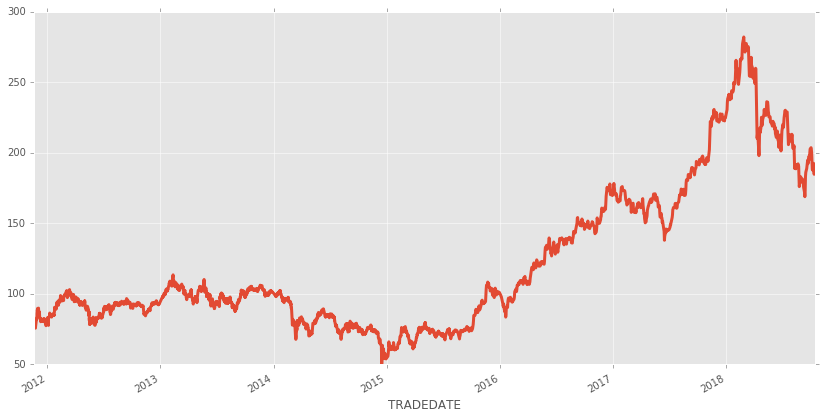

In [56]:
sber_stock['WAPRICE'].plot(lw=3)

In [44]:
sber_stock['21MA'] = sber_stock['WAPRICE'].rolling(window=21).mean()
sber_stock['100MA'] = sber_stock['WAPRICE'].rolling(window=100).mean()

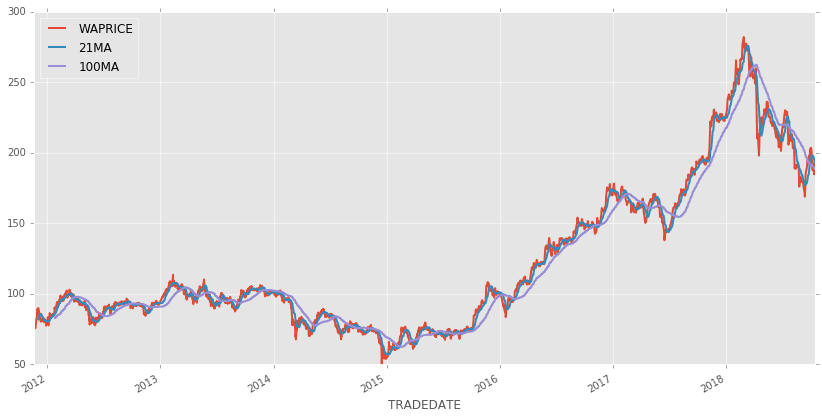

In [58]:
sber_stock[['WAPRICE','21MA', '100MA']].plot(lw=2)

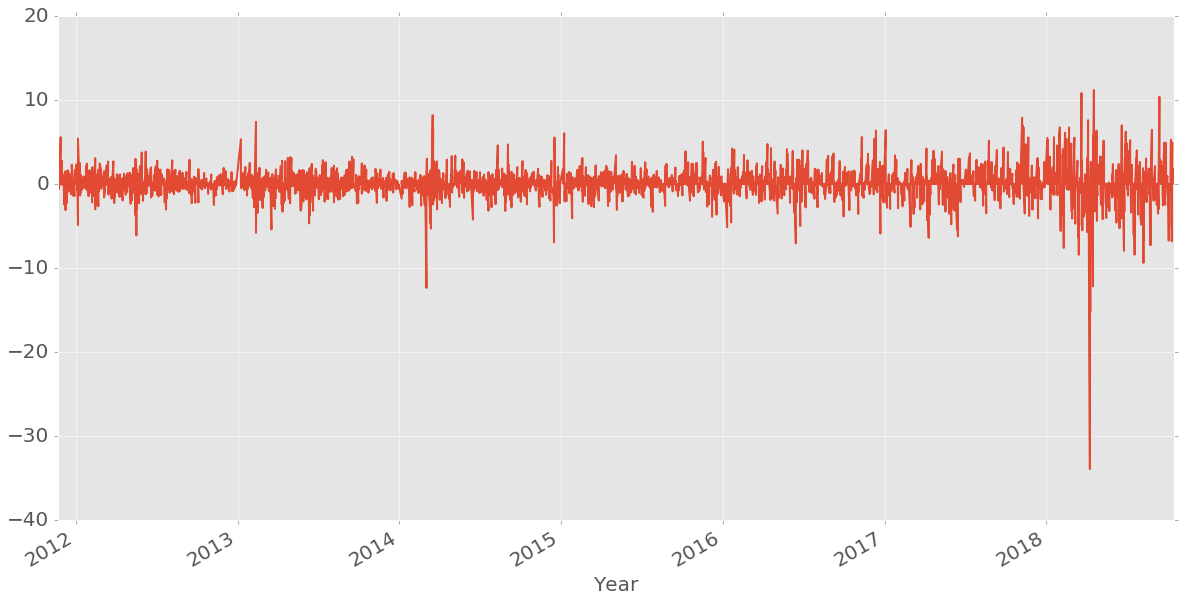

In [61]:
sber_stock['WAPRICE'].diff().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20)

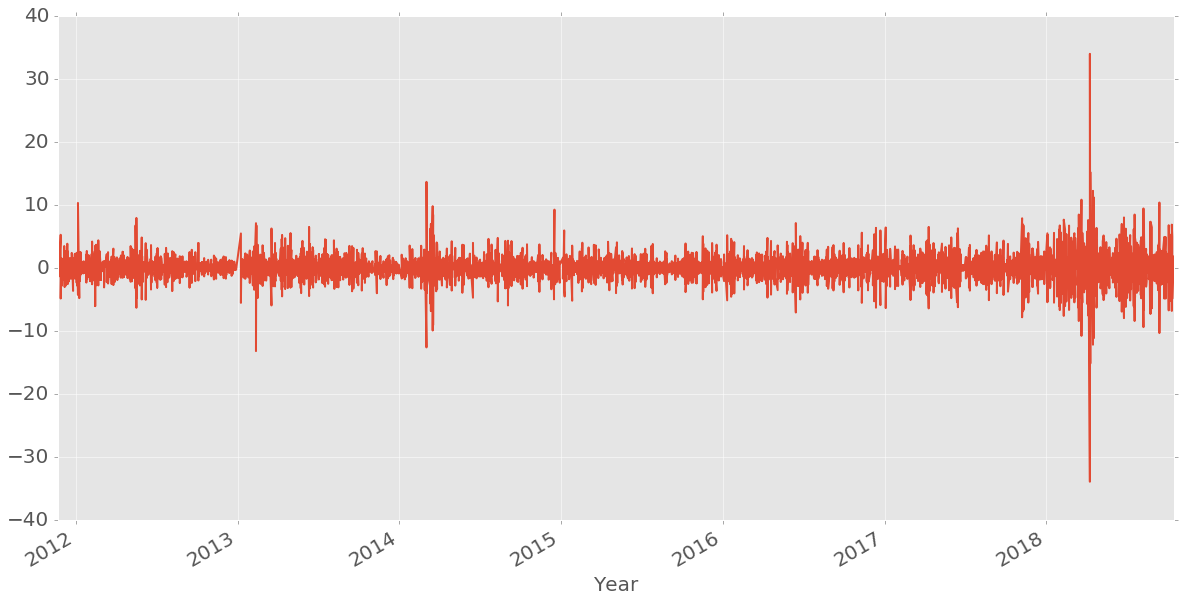

In [63]:
(sber_stock['WAPRICE'].diff()).diff().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20)

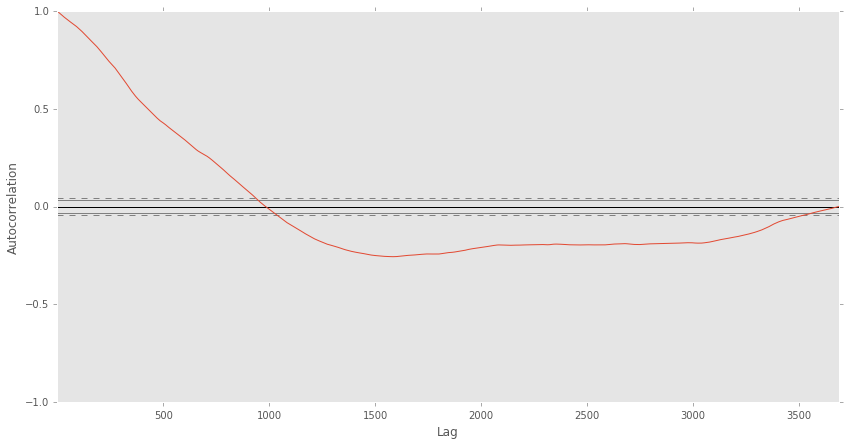

In [64]:
pd.plotting.autocorrelation_plot(sber_stock['WAPRICE'])

Time Series in Python: https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial 

In [50]:
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(sber_stock.WAPRICE)[1])

Критерий Дики-Фуллера: p=0.857450


In [52]:
sm.tsa.seasonal_decompose(sber_stock.WAPRICE).plot()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index witha freq not set to None

## YAHOO

In [37]:
fyf.download('AAPL').head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.415317,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.393649,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.364757,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.373786,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.384620,18362400
